In [1]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,996 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [2]:
train_df['기업가치(백억원)'] = pd.to_numeric(train_df['기업가치(백억원)'].astype(str).str[:4], errors='coerce').astype(float)
test_df['기업가치(백억원)'] = pd.to_numeric(test_df['기업가치(백억원)'].astype(str).str[:4], errors='coerce').astype(float)

<ipython-input-3-18a1e40b6e36>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


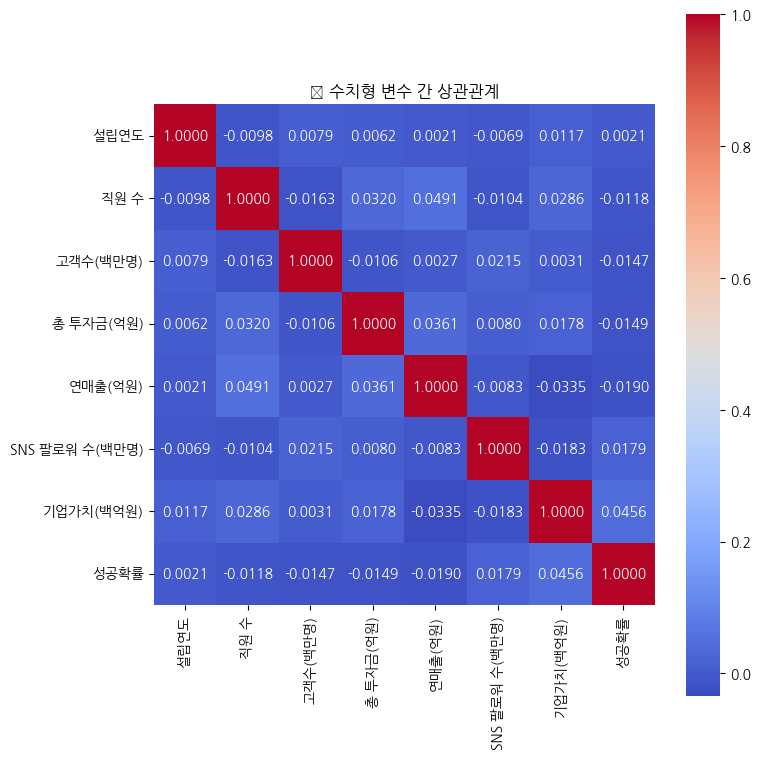

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 추출
num_cols = train_df.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corr_matrix = num_cols.corr()

# 시각화
plt.figure(figsize=(8, 8))

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='coolwarm', square=True)
plt.title("📊 수치형 변수 간 상관관계")
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

# 분야: '미상'으로 채우기
train_df['분야'] = train_df['분야'].fillna('미상')
test_df['분야'] = test_df['분야'].fillna('미상')

# 직원 수: 중앙값으로 대체
# median_staff = train_df['직원 수'].median()
# train_df['직원 수'] = train_df['직원 수'].fillna(median_staff)
# test_df['직원 수'] = test_df['직원 수'].fillna(median_staff)

# 고객수(백만명): 중앙값으로 대체
median_customers = train_df['고객수(백만명)'].median()
train_df['고객수(백만명)'] = train_df['고객수(백만명)'].fillna(median_customers)
test_df['고객수(백만명)'] = test_df['고객수(백만명)'].fillna(median_customers)

# # 기업가치(백억원): 중앙값으로 대체
# median_value = train_df['기업가치(백억원)'].median()
# train_df['기업가치(백억원)'] = train_df['기업가치(백억원)'].fillna(median_value)
# test_df['기업가치(백억원)'] = test_df['기업가치(백억원)'].fillna(median_value)

In [5]:
# 2025년 기준 기업 연령
train_df['기업_연령'] = 2025 - train_df['설립연도']
test_df['기업_연령'] = 2025 - test_df['설립연도']

# 투자금 대비 연매출 (투자 효율성)
train_df['투자금_대비_연매출'] = train_df['연매출(억원)'] / (train_df['총 투자금(억원)'] + 1e-6)
test_df['투자금_대비_연매출'] = test_df['연매출(억원)'] / (test_df['총 투자금(억원)'] + 1e-6)

# 연매출 대비 기업가치 (밸류에이션)
train_df['연매출_대비_기업가치'] = train_df['기업가치(백억원)'] / (train_df['연매출(억원)'] + 1e-6)
test_df['연매출_대비_기업가치'] = test_df['기업가치(백억원)'] / (test_df['연매출(억원)'] + 1e-6)

# 고객수 대비 연매출
train_df['고객수_대비_연매출']= train_df['연매출(억원)']/(train_df['고객수(백만명)'] + 1e-6)
test_df['고객수_대비_연매출']= test_df['연매출(억원)']/(test_df['고객수(백만명)'] + 1e-6)

In [6]:
def winsorize_series(s, lower_quantile=0.01, upper_quantile=0.99):
    lower_val = s.quantile(lower_quantile)
    upper_val = s.quantile(upper_quantile)
    return s.clip(lower_val, upper_val)

winsor_col = ["총 투자금(억원)", "연매출(억원)", "투자금_대비_연매출", "연매출_대비_기업가치", "고객수_대비_연매출"]

for col in winsor_col:
    train_df[col] = winsorize_series(train_df[col], 0.01, 0.99)

In [7]:
# 로그 변환 (log1p 사용)
for col in ["총 투자금(억원)", "연매출(억원)", "투자금_대비_연매출", "연매출_대비_기업가치", "고객수_대비_연매출"]:
    train_df[f'{col}'] = np.log1p(train_df[col])
    test_df[f'{col}'] = np.log1p(test_df[col])

In [8]:
from sklearn.preprocessing import LabelEncoder

# 설립연도 타입 변환 (int -> object)
train_df['설립연도'] =train_df['설립연도'].astype('object')
test_df['설립연도'] =test_df['설립연도'].astype('object')

category_features = ['설립연도','국가','분야','투자단계']
bool_features = ['인수여부','상장여부']

# LabelEncoder 객체를 각 범주형 feature별로 따로 저장하여 사용
encoders = {}

# 범주형 데이터를 encoding
for feature in category_features:
    encoders[feature] = LabelEncoder()
    train_df[feature] = encoders[feature].fit_transform(train_df[feature])
    test_df[feature] = encoders[feature].transform(test_df[feature])

# 불리언 값을 0과 1로 변환 ('Yes' → 1, 'No' → 0 으로 변환)
bool_map = {'Yes': 1, 'No': 0}

for feature in bool_features:
    train_df[feature] = train_df[feature].map(bool_map)
    test_df[feature] = test_df[feature].map(bool_map)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # 전체 X에 대해 스케일링

# 이후 train/test split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import Counter
import numpy as np
import pandas as pd

# 타겟 변수
target = '성공확률'

# 학습에 사용할 피처 (ID, 성공확률 제외)
features = [col for col in train_df.columns if col not in ['ID', target]]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# RMSE, R² 계산
rmse = mean_squared_error(y_val, y_pred) ** 0.5
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

# WMAE 계산을 위한 가중치 만들기 (정답값의 빈도 기반)
value_counts = Counter(y_val)
weights = y_val.map(lambda v: 1 / value_counts[v])  # 각 y_val 값에 대응하는 가중치

# WMAE 계산
wmae = np.sum(weights * np.abs(y_val - y_pred)) / np.sum(weights)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAE : {mae:.4f}" )
print(f"WMAE: {wmae:.4f}")

RMSE: 0.2404
R²: 0.0002
MAE : 0.1999
WMAE: 0.2072


In [13]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': test_preds
})

# 결과 저장
submission.to_csv('submission.csv', index=False)

print("✅ 제출 파일 'submission.csv' 생성 완료!")

✅ 제출 파일 'submission.csv' 생성 완료!


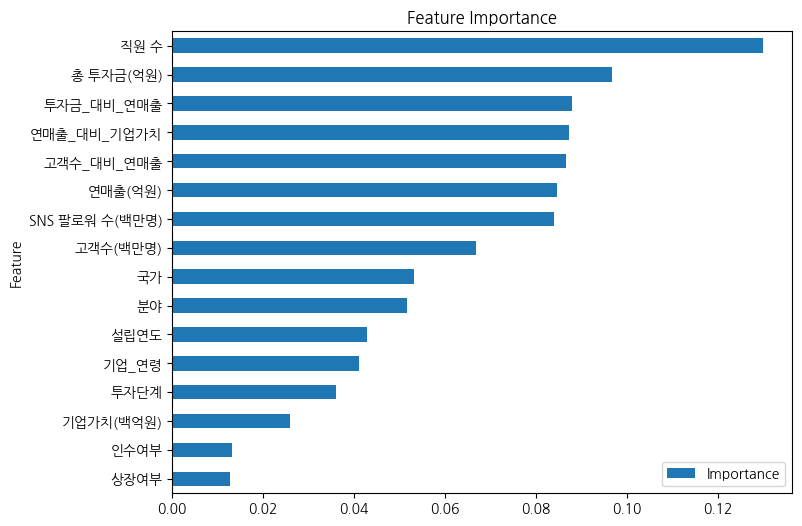

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 피처 중요도 추출
importances = model.feature_importances_
feature_names = X_train.columns

# 중요도 정렬 시각화
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title="Feature Importance")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.gca().invert_yaxis()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# 타겟 변수
target = '성공확률'

# 학습에 사용할 피처 (ID, 성공확률 제외)
features = [col for col in train_df.columns if col not in ['ID', target,'투자단계','분야','SNS 팔로워 수(백만명)','고객수(백만명)','설립연도']]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=75, max_depth=25, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
rmse = (mean_squared_error(y_val, y_pred))**0.5
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val,y_pred)

# WMAE 계산을 위한 가중치 만들기 (정답값의 빈도 기반)
value_counts = Counter(y_val)
weights = y_val.map(lambda v: 1 / value_counts[v])  # 각 y_val 값에 대응하는 가중치

# WMAE 계산
wmae = np.sum(weights * np.abs(y_val - y_pred)) / np.sum(weights)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAE : {mae:.4f}" )
print(f"WMAE: {wmae:.4f}")

RMSE: 0.2373
R²: -0.0102
MAE : 0.1960
WMAE: 0.2080


In [16]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': test_preds
})

# 결과 저장
submission.to_csv('submission.csv', index=False)

print("✅ 제출 파일 'submission.csv' 생성 완료!")

✅ 제출 파일 'submission.csv' 생성 완료!


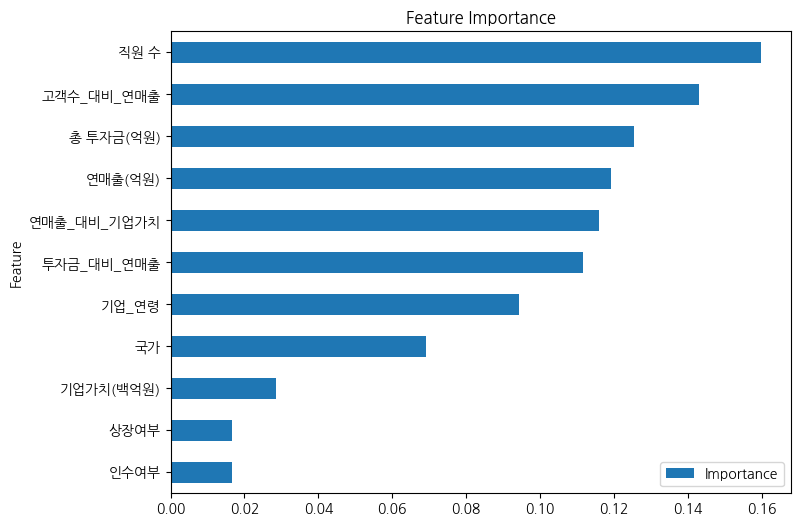

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 피처 중요도 추출
importances = model.feature_importances_
feature_names = X_train.columns

# 중요도 정렬 시각화
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title="Feature Importance")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.gca().invert_yaxis()
plt.show()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from collections import Counter
import numpy as np
import pandas as pd

# 타겟 변수
target = '성공확률'

# ✅ feature 목록 정의
features = [col for col in train_df.columns if col not in ['ID', target,'투자단계','분야','SNS 팔로워 수(백만명)','고객수(백만명)','설립연도']]

# ✅ X, y 분리
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# ✅ 제출용 test 데이터 전처리
X_test = test_df[features].select_dtypes(exclude='object')

# ✅ 스케일러로 전체 X (train_df 기준) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# ✅ 스케일된 X로 train/val 분리
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# ✅ 모델 학습
model = RandomForestRegressor(n_estimators=75, max_depth=25, random_state=42)
model.fit(X_train_scaled, y_train)

# ✅ 예측 및 평가
y_pred_val = model.predict(X_val_scaled)

rmse = mean_squared_error(y_val, y_pred_val) ** 0.5
r2 = r2_score(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)

# ✅ WMAE 계산
value_counts = Counter(y_val)
weights = y_val.map(lambda v: 1 / value_counts[v])
wmae = np.sum(weights * np.abs(y_val - y_pred_val)) / np.sum(weights)

# ✅ 결과 출력
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAE : {mae:.4f}")
print(f"WMAE: {wmae:.4f}")

# ✅ test 데이터 예측 및 제출 파일 저장
y_pred_test = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': y_pred_test
})
submission.to_csv('submission.csv', index=False)

RMSE: 0.2372
R²: -0.0094
MAE : 0.1961
WMAE: 0.2081
